비 지도학습은 정답을 알려주지 않고 데이터의 특성만을 고려해서 비슷한 특성끼리 묶는것...

In [1]:
# 데이터는 fruits_300.npy

In [2]:
import numpy as np
data =  np.load("/content/fruits_300.npy")

In [3]:
data.shape

(300, 100, 100)

In [4]:
data_2d = data.reshape(300,-1)
data_2d.shape

(300, 10000)

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=50)
km.fit(data_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=50)

In [10]:
km.labels_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [11]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))

In [18]:
label_0 = np.where(km.labels_ == 0)[0]
label_1 = np.where(km.labels_ == 1)[0]
label_2 = np.where(km.labels_ == 2)[0]

In [22]:
len(label_0)/5, np.ceil(len(label_0)/5)


(19.6, 20.0)

In [40]:
import matplotlib.pyplot as plt
def show_cluster_img(label_num):
  label_0 = np.where(km.labels_ == label_num)[0]
  row = int(np.ceil(len(label_0)/10))

  for i,label_index in enumerate(label_0):
    plt.subplot(row,10,i+1)
    plt.imshow(data[label_index],cmap='gray_r')
    plt.axis('off')
  plt.show()

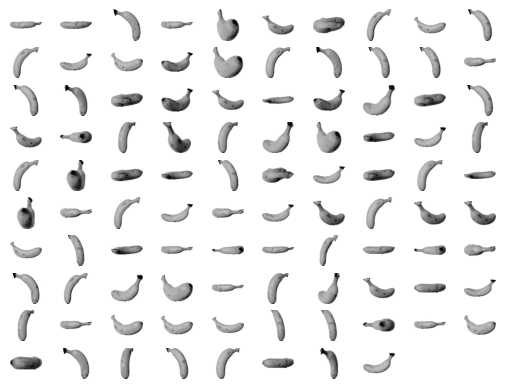

In [44]:
show_cluster_img(0)

클러스터의 중심점

In [47]:
km.cluster_centers_.shape

(3, 10000)

In [48]:
cluster_3d = km.cluster_centers_.reshape(-1,100,100)
cluster_3d.shape

(3, 100, 100)

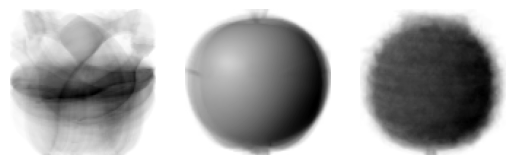

In [49]:
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(cluster_3d[i],cmap='gray_r')
  plt.axis('off')
plt.show()

군집 즉 클러스터의 개수를 알고 있으나.. 실제는 모른다는 가정하게 최적의 클러스터 수를 찾아야함

In [52]:
# km.inertia_  # 클러스터의 응집도를 나타냄 이 값이 작을수록 조밀하게 모여 있음
# 최적의 클러스터 개수는 클러스터를 증가하면서 inertia_ 이 값이 변하는 구간이 최적의 k

In [57]:
intertia = []
for k in range(2,10):
  km = KMeans(n_clusters=k,random_state=42,n_init='auto')
  km.fit(data.reshape(300,-1))
  intertia.append(km.inertia_)

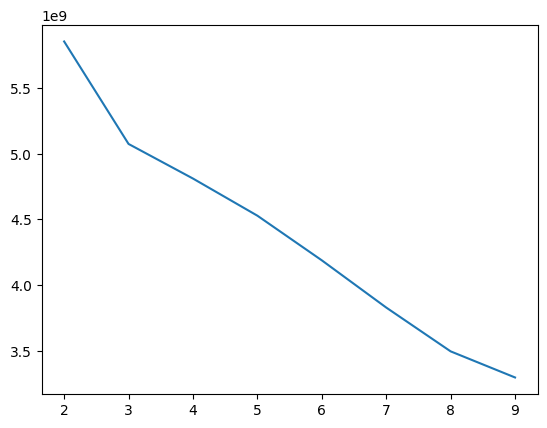

In [59]:
# 가장 많이 꺽이는 클러스터의 수가 최적의 클러스터 수가 된다
plt.plot(range(2,10),intertia)
plt.show()